In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams

from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.metrics import f1_score, confusion_matrix, precision_recall_curve, roc_curve
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler


import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

import warnings
warnings.filterwarnings(action='ignore')


In [ ]:
def get_clf_eval(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix( y_test, pred)
    accuracy = accuracy_score(y_test , pred)
    precision = precision_score(y_test , pred)
    recall = recall_score(y_test , pred)
    f1 = f1_score(y_test,pred)

    roc_auc = roc_auc_score(y_test, pred_proba)

    # ROC-AUC print
    print('accuracy: {0:.4f}, precision: {1:.4f}, recall: {2:.4f},\
    F1: {3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))
    return confusion

In [ ]:
diabetes_df = pd.read_csv("/content/diabetes.csv")
diabetes_df.head().T.style.set_properties(**{'background-color': 'grey',
                           'color': 'white',
                           'border-color': 'white'})

,0,1,2,3,4
Pregnancies,6.000000,1.000000,8.000000,1.000000,0.000000
Glucose,148.000000,85.000000,183.000000,89.000000,137.000000
BloodPressure,72.000000,66.000000,64.000000,66.000000,40.000000
SkinThickness,35.000000,29.000000,0.000000,23.000000,35.000000
Insulin,0.000000,0.000000,0.000000,94.000000,168.000000
BMI,33.600000,26.600000,23.300000,28.100000,43.100000
DiabetesPedigreeFunction,0.627000,0.351000,0.672000,0.167000,2.288000
Age,50.000000,31.000000,32.000000,21.000000,33.000000
Outcome,1.000000,0.000000,1.000000,0.000000,1.000000


In [ ]:
diabetes_df.rename(columns ={"DiabetesPedigreeFunction":"DPF"},inplace=True)

<Axes: >

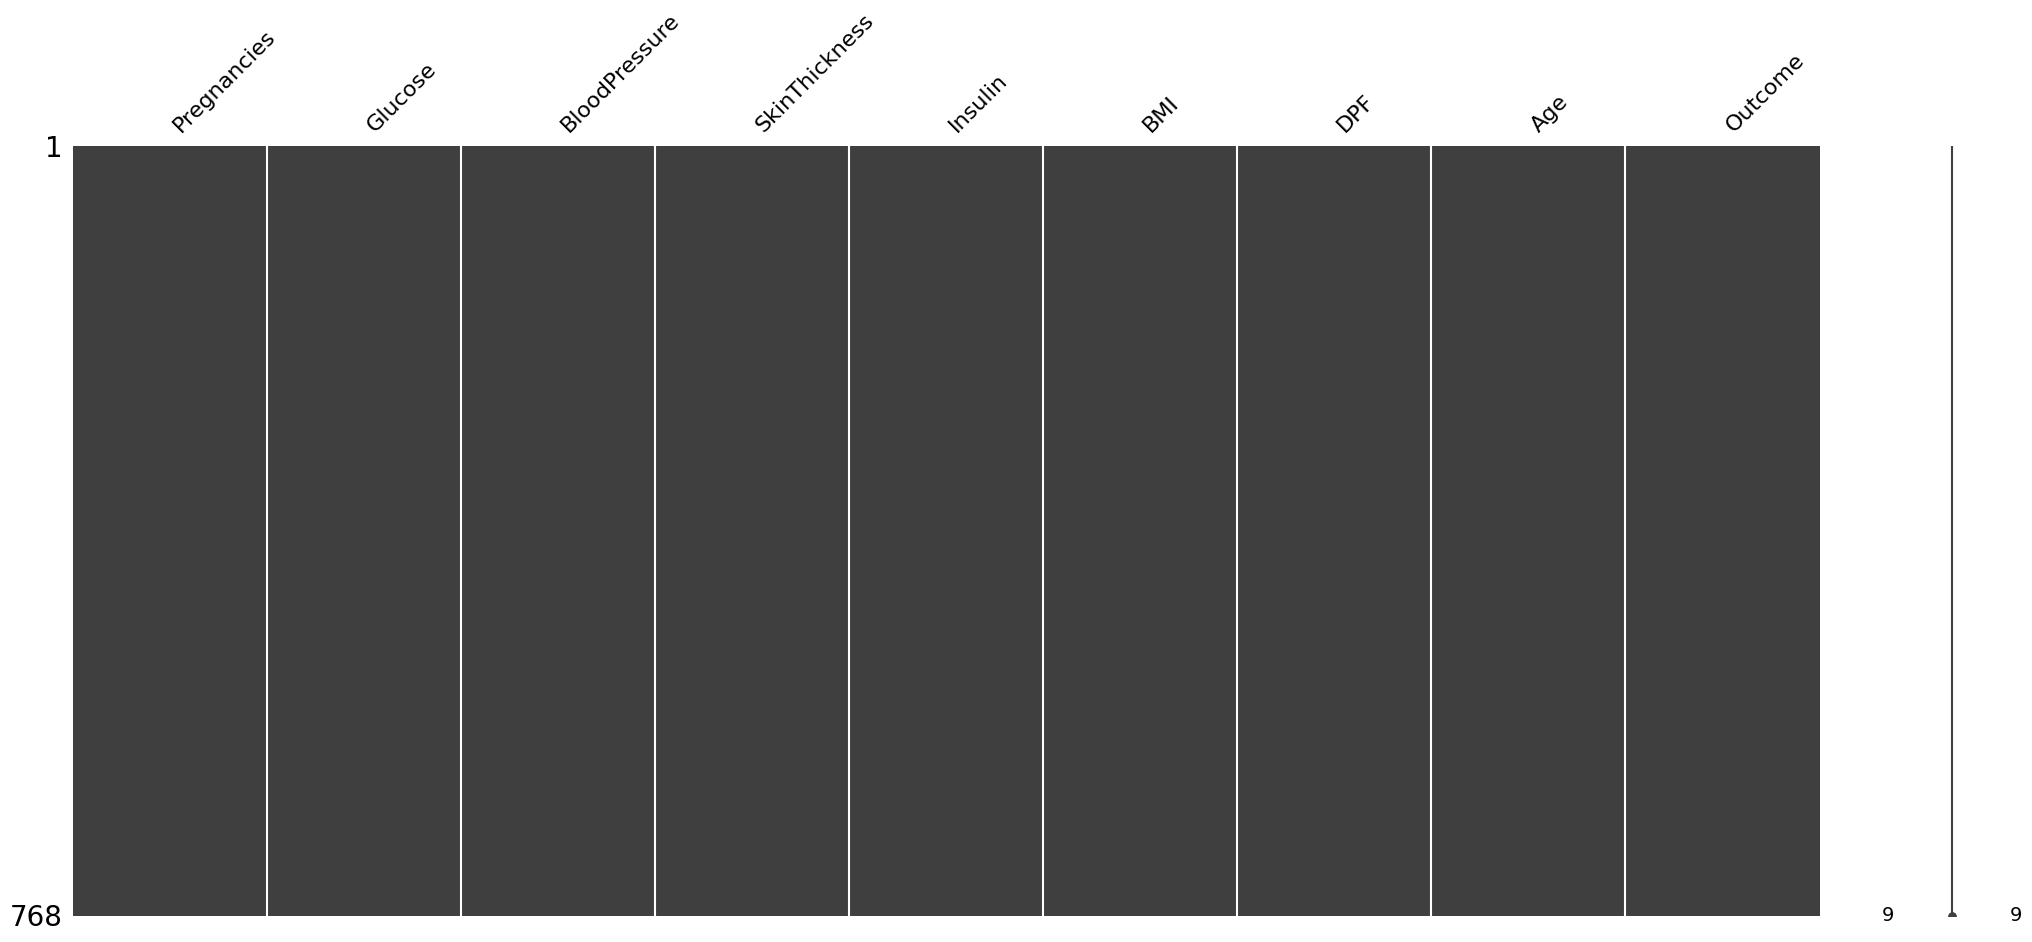

In [ ]:
import missingno as msno
msno.matrix(diabetes_df)

In [ ]:
colors = ['gold', 'mediumturquoise']
labels = ['0','1']
values = diabetes_df['Outcome'].value_counts()/diabetes_df['Outcome'].shape[0]

# Use `hole` to create a donut-like pie chart
fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.3)])
fig.update_traces(hoverinfo='label+percent', textinfo='percent', textfont_size=20,
                  marker=dict(colors=colors, line=dict(color='#000000', width=2)))
fig.update_layout(
    title_text="Outcome")
fig.show()

In [ ]:
def highlight_min(s, props=''):
    return np.where(s == np.nanmin(s.values), props, '')

diabetes_df.describe().style.apply(highlight_min, props='color:Black;background-color:Grey', axis=0)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DPF,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
feature_names = [cname for cname in diabetes_df.loc[:,:'Age'].columns]

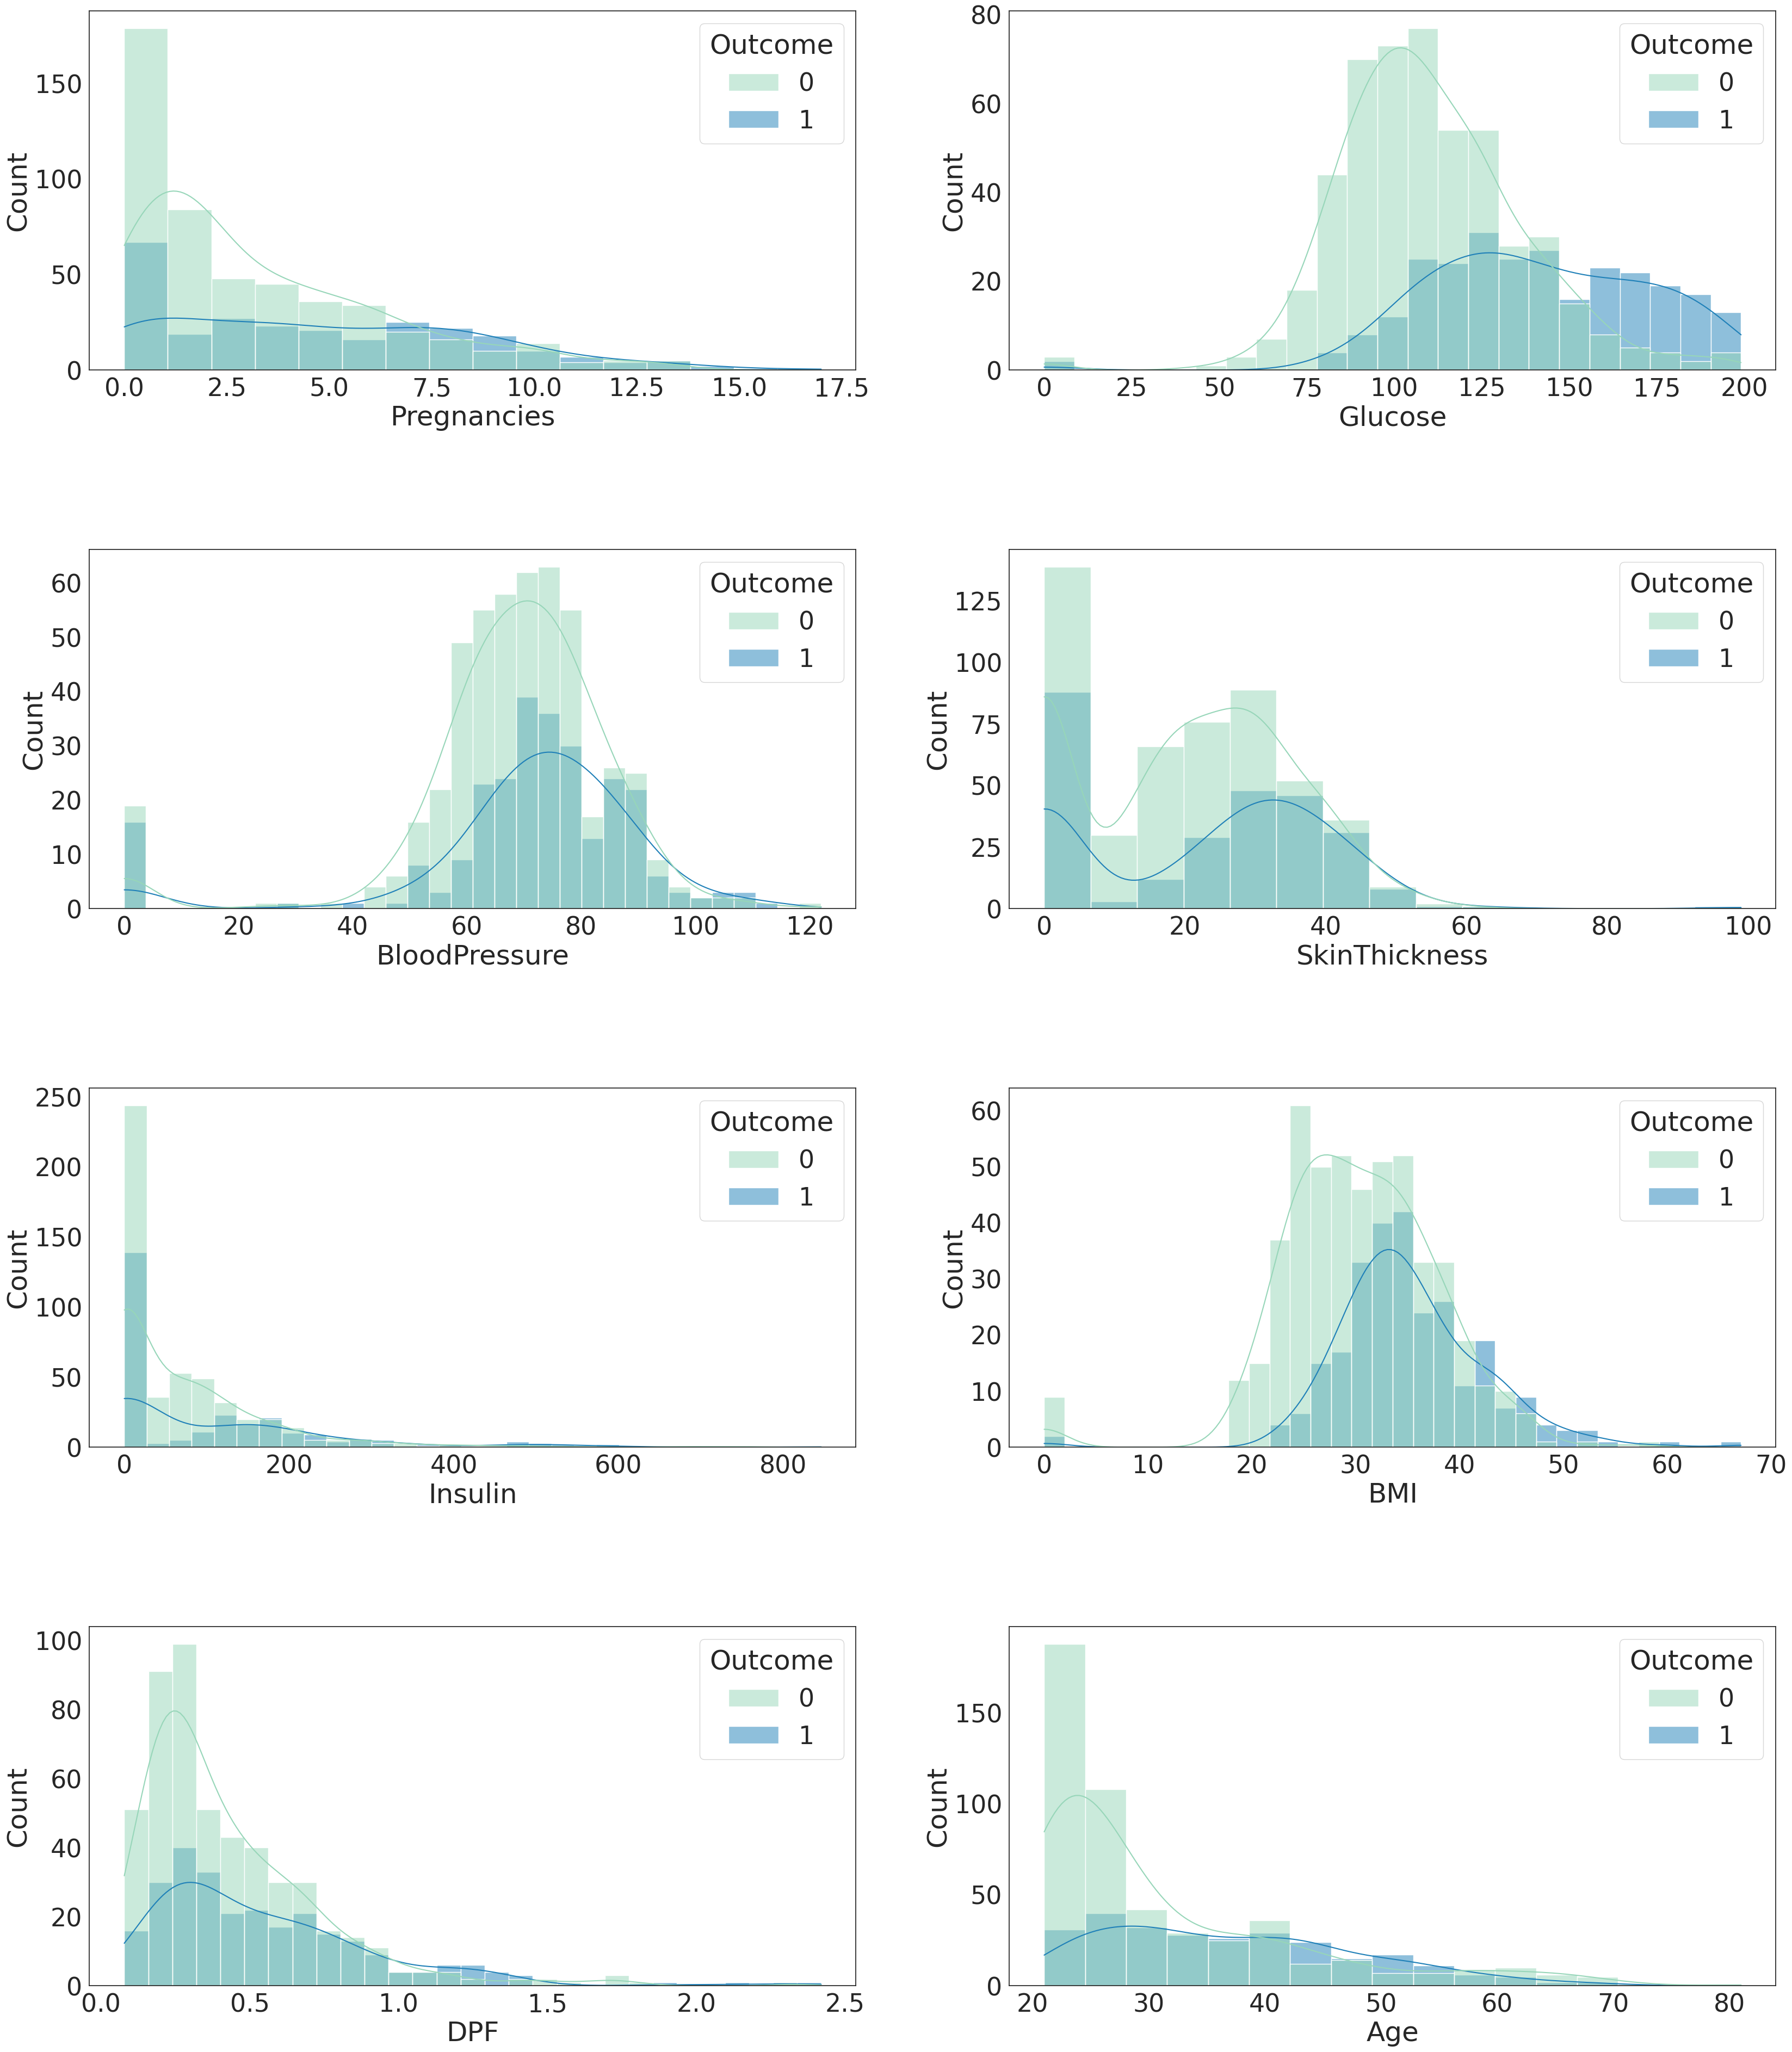

In [ ]:
rcParams['figure.figsize'] = 40,60
sns.set(font_scale = 3)
sns.set_style("white")
sns.set_palette("bright")
plt.subplots_adjust(hspace=0.5)
i = 1;
for name in feature_names:
    plt.subplot(5,2,i)
    sns.histplot(data=diabetes_df, x=name, hue="Outcome",kde=True,palette="YlGnBu")
    i = i + 1

In [ ]:
zero_features = ['Pregnancies','Glucose','BloodPressure','SkinThickness',"Insulin",'BMI']
total_count = diabetes_df['Glucose'].count()

for feature in zero_features:
    zero_count = diabetes_df[diabetes_df[feature]==0][feature].count()
    print('{0} 0 number of cases {1}, percent is {2:.2f} %'.format(feature, zero_count, 100*zero_count/total_count))

Pregnancies 0 number of cases 111, percent is 14.45 %
Glucose 0 number of cases 5, percent is 0.65 %
BloodPressure 0 number of cases 35, percent is 4.56 %
SkinThickness 0 number of cases 227, percent is 29.56 %
Insulin 0 number of cases 374, percent is 48.70 %
BMI 0 number of cases 11, percent is 1.43 %


In [ ]:
diabetes_mean = diabetes_df[zero_features].mean()
diabetes_df[zero_features]=diabetes_df[zero_features].replace(0, diabetes_mean)

In [ ]:
X = diabetes_df.iloc[:,:-1]
y = diabetes_df.iloc[:,-1]

In [ ]:
from sklearn.preprocessing import QuantileTransformer
scaler = QuantileTransformer(n_quantiles=100, random_state=0, output_distribution='normal')
X_scaled = scaler.fit_transform(X)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [ ]:
def highlight_min(s, props=''):
    return np.where(s == np.nanmin(s.values), props, '')

X_train.describe().style.apply(highlight_min, props='color:Black;background-color:Grey', axis=0)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DPF,Age
count,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000
mean,4.315407,121.709154,72.144653,26.341978,118.600098,32.315027,0.468618,32.921875
std,2.916151,30.080570,12.113756,9.158041,94.570101,6.878494,0.339325,11.507539
min,1.000000,44.000000,24.000000,8.000000,14.000000,18.200000,0.078000,21.000000
25%,2.000000,100.000000,64.000000,20.536458,79.799479,27.275000,0.240000,24.000000
50%,3.845052,118.000000,72.000000,23.000000,79.799479,32.000000,0.372500,29.000000
75%,6.000000,138.250000,80.000000,32.000000,127.500000,36.325000,0.612250,40.000000
max,17.000000,199.000000,122.000000,63.000000,846.000000,67.100000,2.420000,81.000000


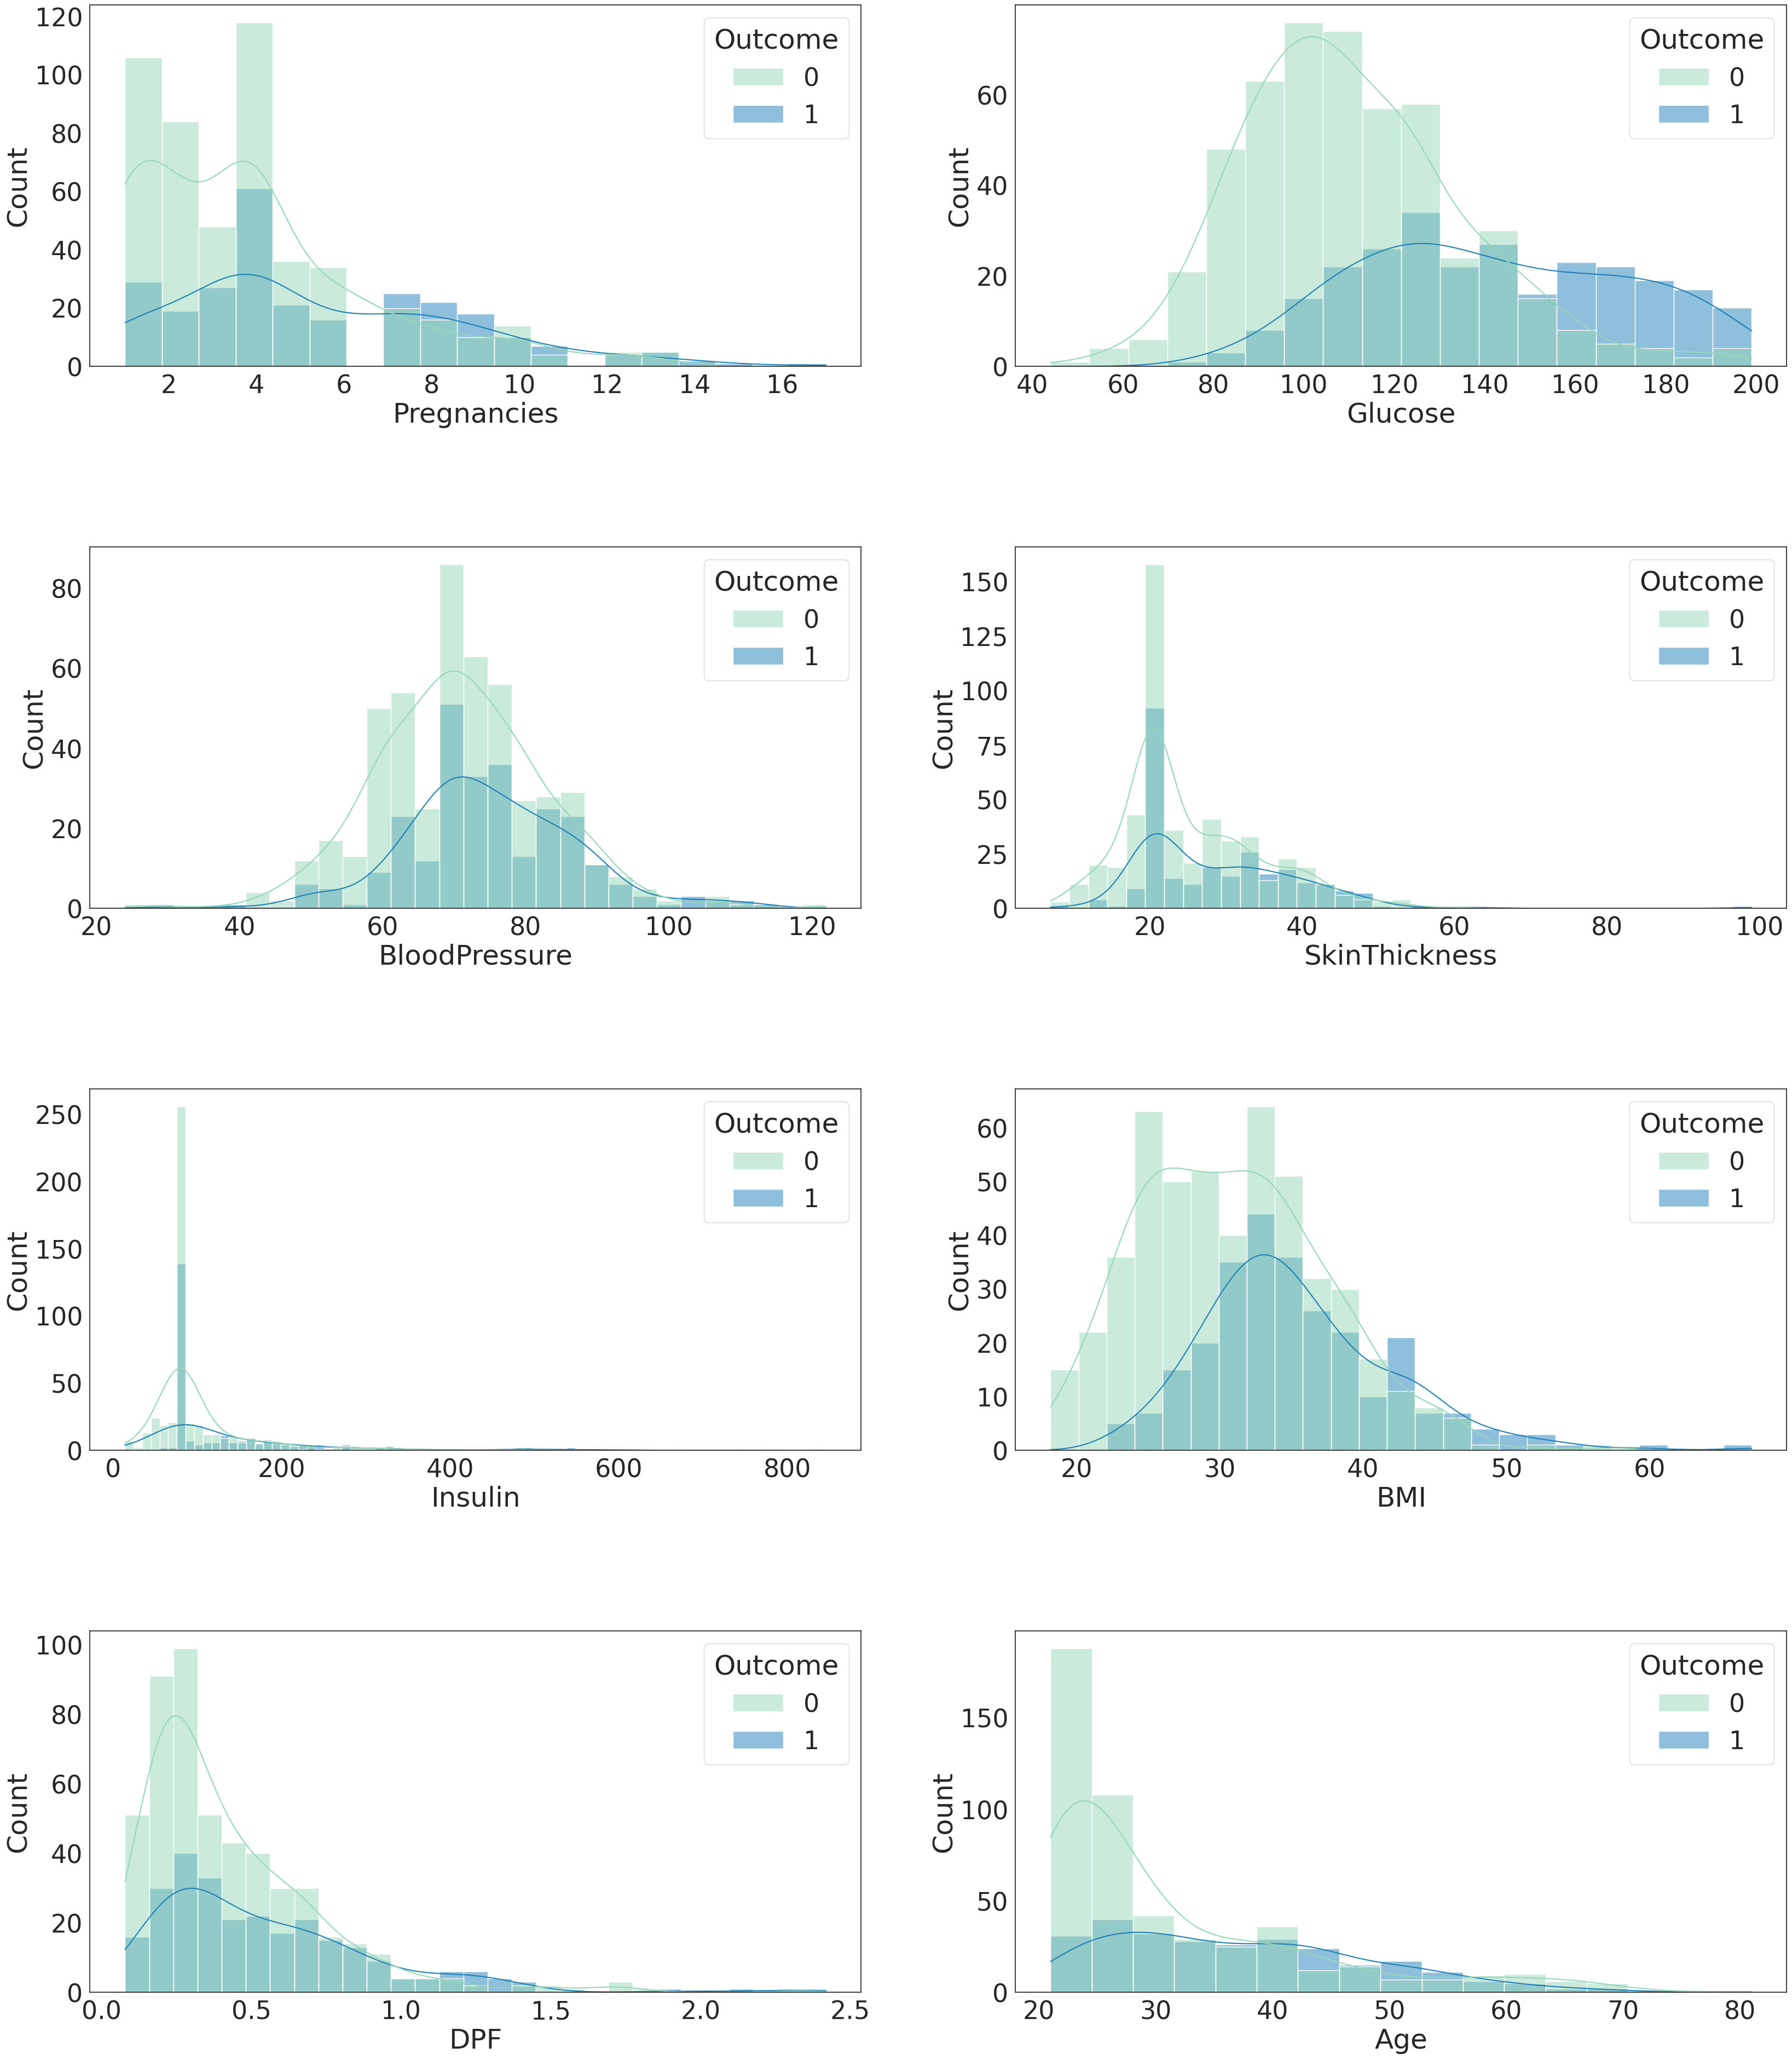

In [ ]:
rcParams['figure.figsize'] = 40,60
sns.set(font_scale = 3)
sns.set_style("white")
sns.set_palette("bright")
plt.subplots_adjust(hspace=0.5)
i = 1;
for name in feature_names:
    plt.subplot(5,2,i)
    sns.histplot(data=diabetes_df, x=name, hue="Outcome",kde=True,palette="YlGnBu")
    i = i + 1

Text(0.5, 1.0, 'Correlation Plot')

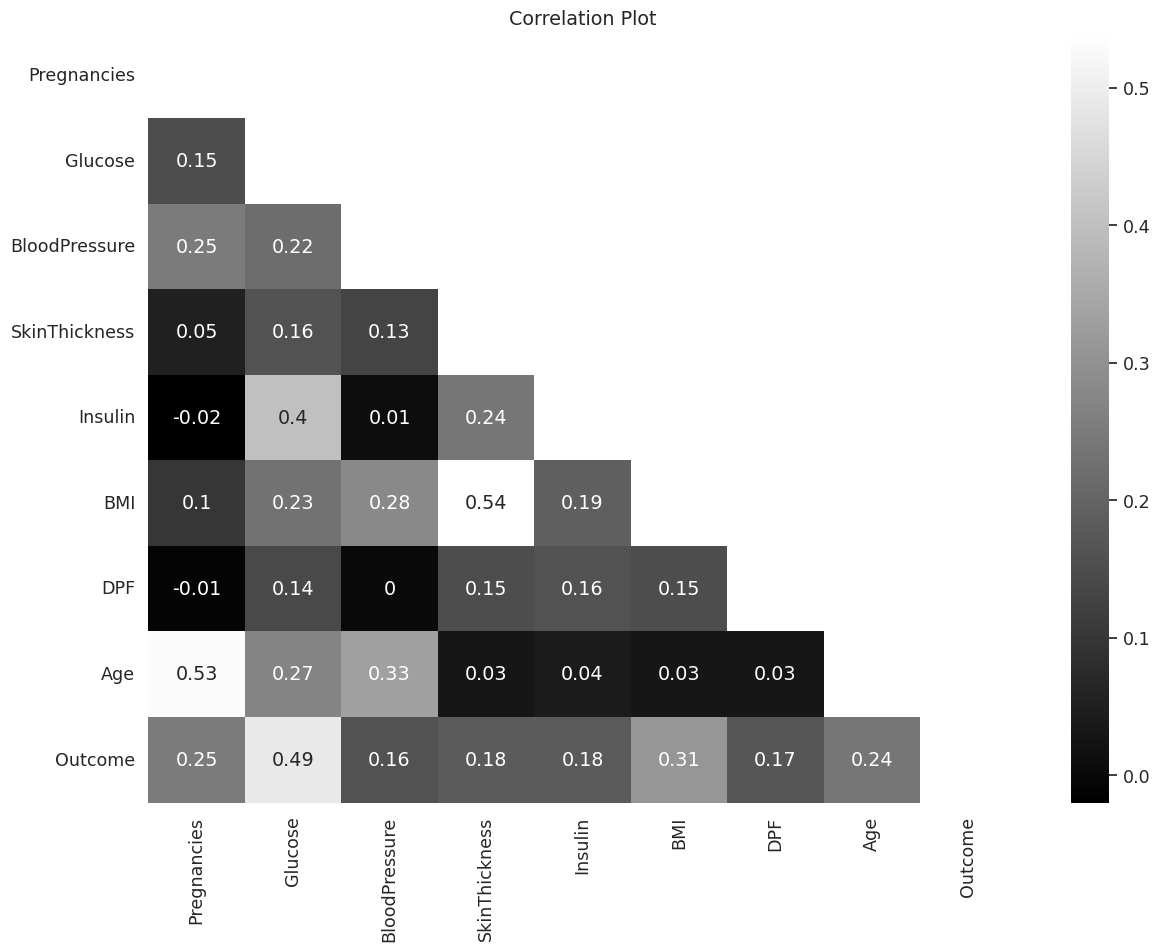

In [ ]:
corr=diabetes_df.corr().round(2)

sns.set(font_scale=1.15)
plt.figure(figsize=(14, 10))
sns.set_palette("bright")
sns.set_style("white")
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr,annot=True,cmap='gist_yarg_r',mask=mask,cbar=True)
plt.title('Correlation Plot')

<Figure size 1000x800 with 0 Axes>

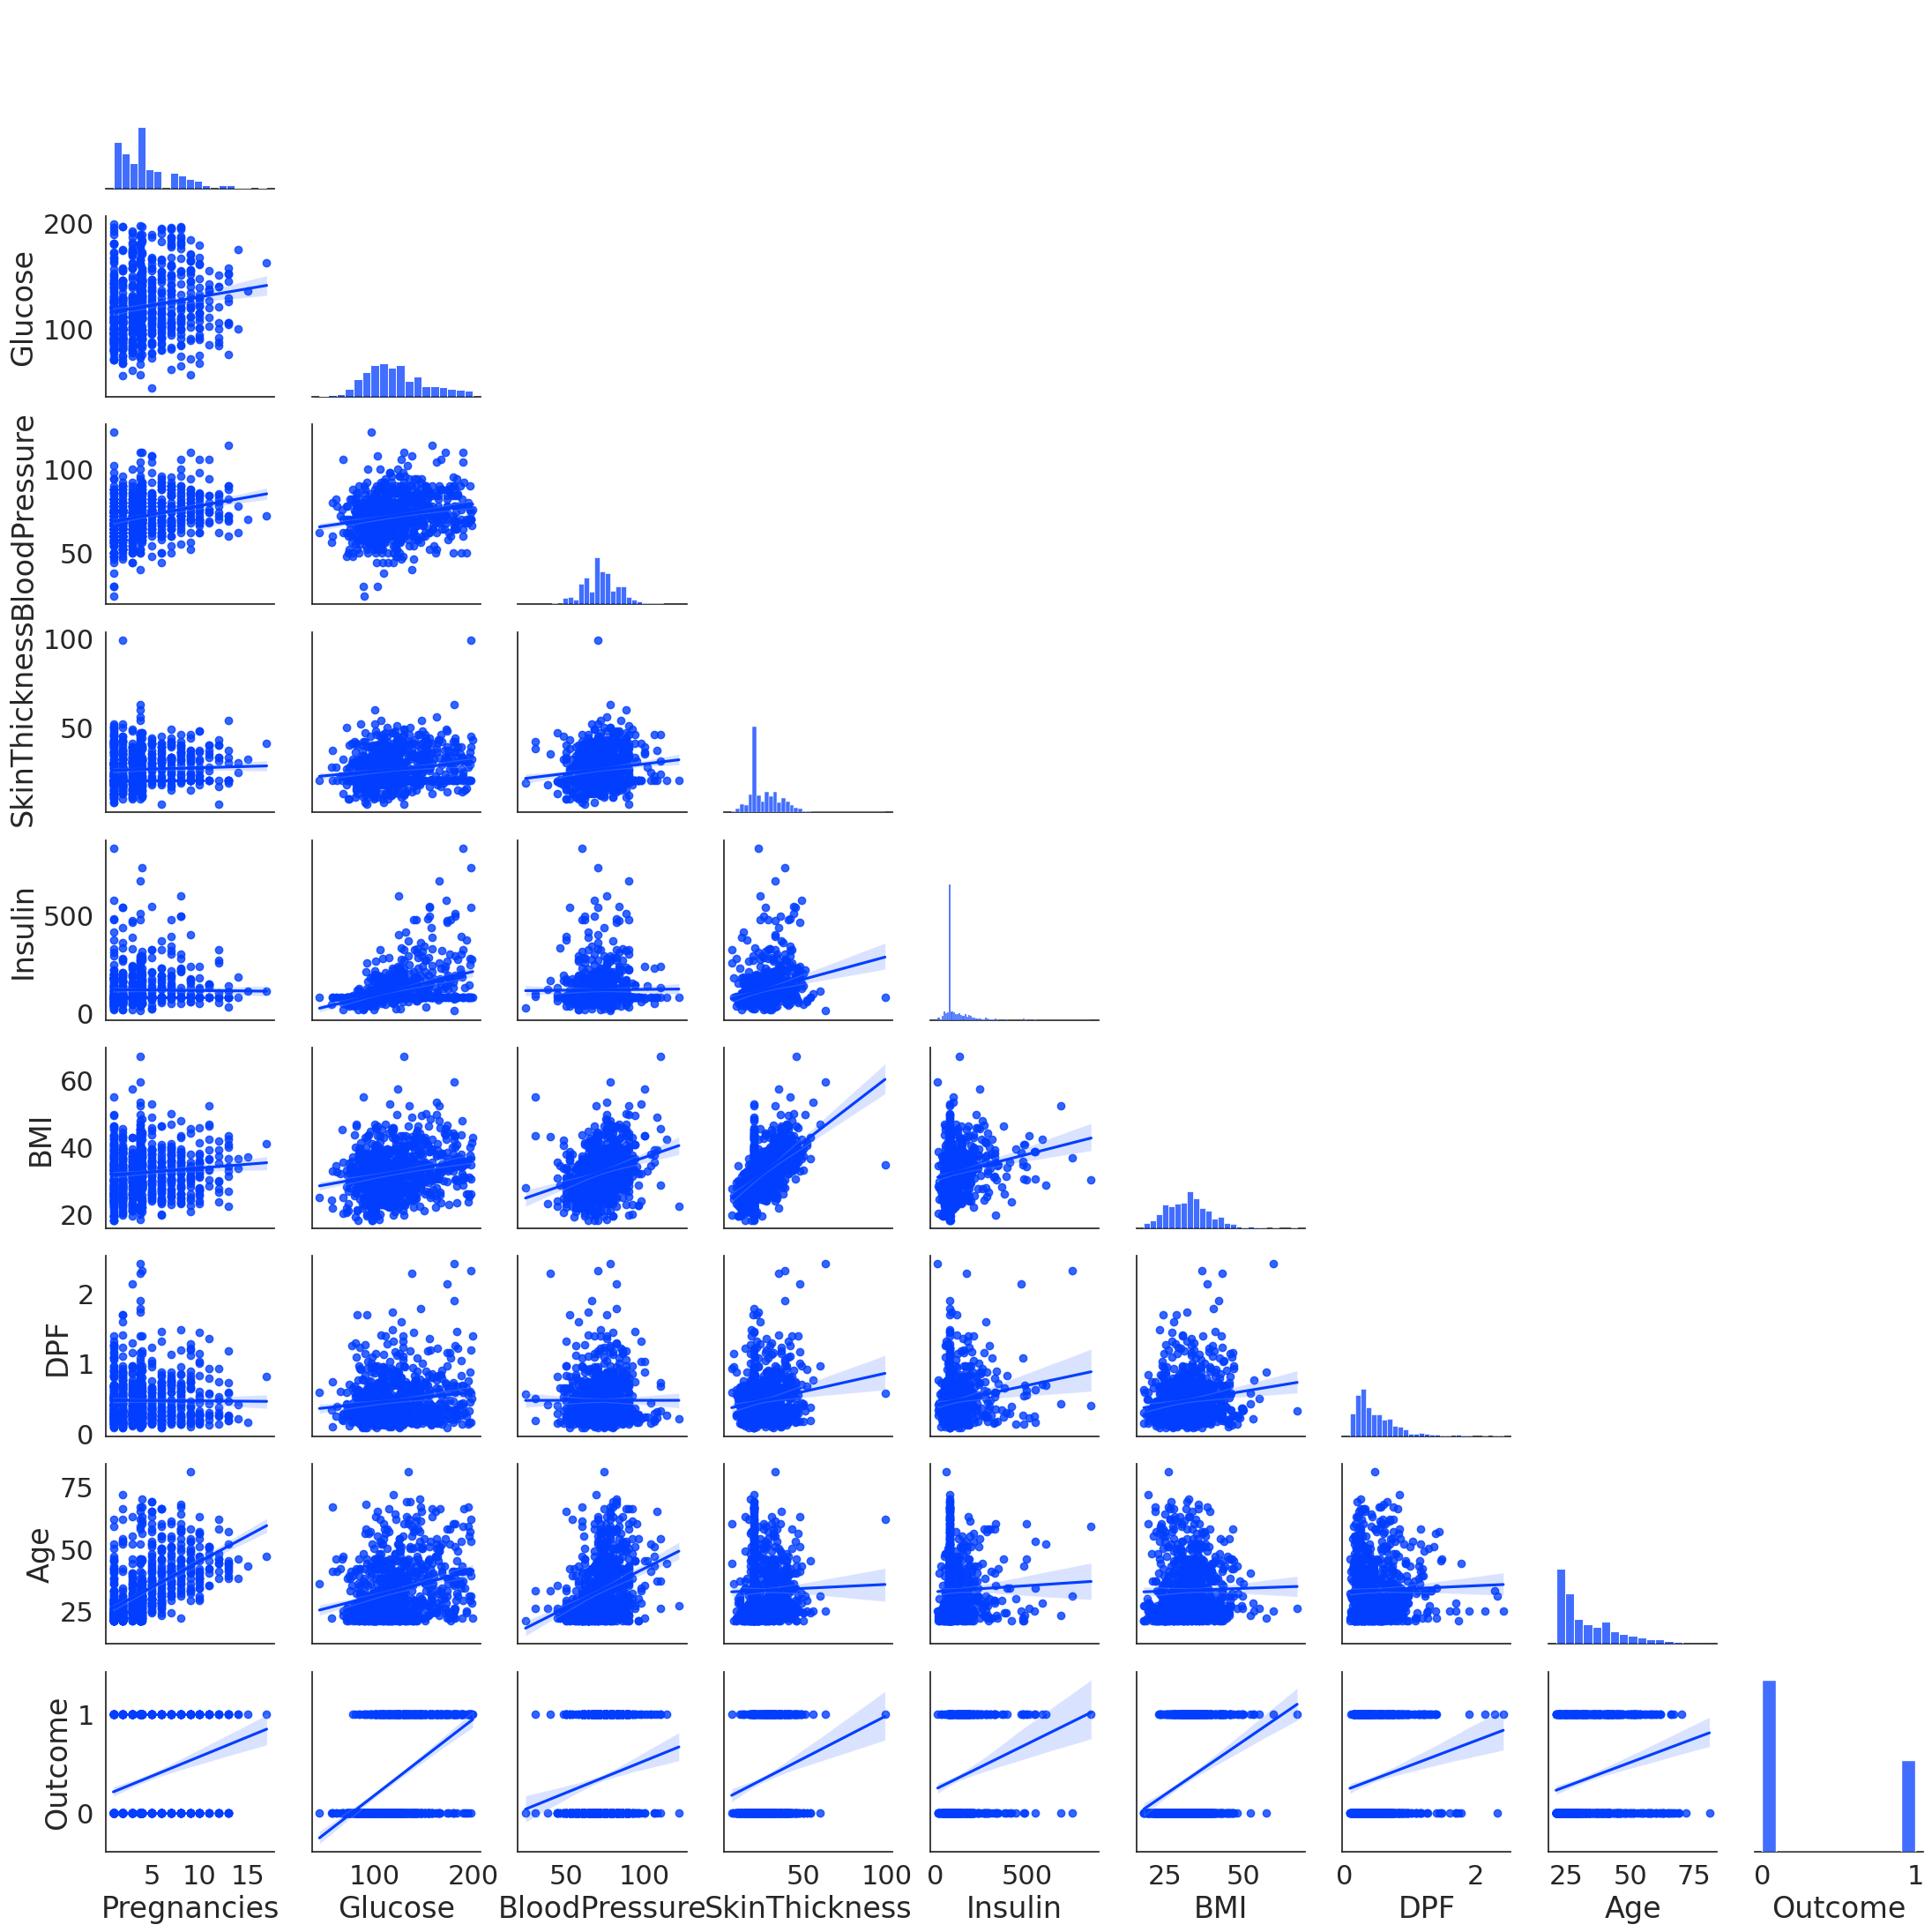

In [ ]:
sns.set(font_scale=2)
plt.figure(figsize=(10, 8))
sns.set_style("white")
sns.set_palette("bright")
sns.pairplot(diabetes_df,kind = 'reg',corner = True,palette ='YlGnBu' )

In [ ]:
fig = px.histogram(diabetes_df, x="Glucose",
                   color="Outcome",
                   marginal="box",
                   barmode ="overlay",
                   histnorm ='density'
                  )
fig.update_layout(
    title_font_color="black",
    legend_title_font_color="green",
    title={
        'text': "Glucose Histogram per Outcome",
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
)
fig.show()

In [ ]:

import plotly.express as px
fig = px.histogram(diabetes_df, x="BMI",
                   color="Outcome",
                   marginal="box",
                   barmode ="overlay",
                   histnorm ='density'
                  )
fig.update_layout(
    title_font_color="black",
    legend_title_font_color="green",
    title={
        'text': "BMI Histogram per Outcome",
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
)
fig.show()

In [ ]:

import plotly.express as px
fig = px.histogram(diabetes_df, x="Age",
                   color="Outcome",
                   marginal="box",
                   barmode ="overlay",
                   histnorm ='density'
                  )
fig.update_layout(
    title_font_color="black",
    legend_title_font_color="green",
    title={
        'text': "Age Histogram per Outcome",
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
)
fig.show()

In [ ]:
X_train = diabetes_df.drop('Outcome',axis=1)
y_train = diabetes_df['Outcome']

In [ ]:
!pip install umap-learn[plot]


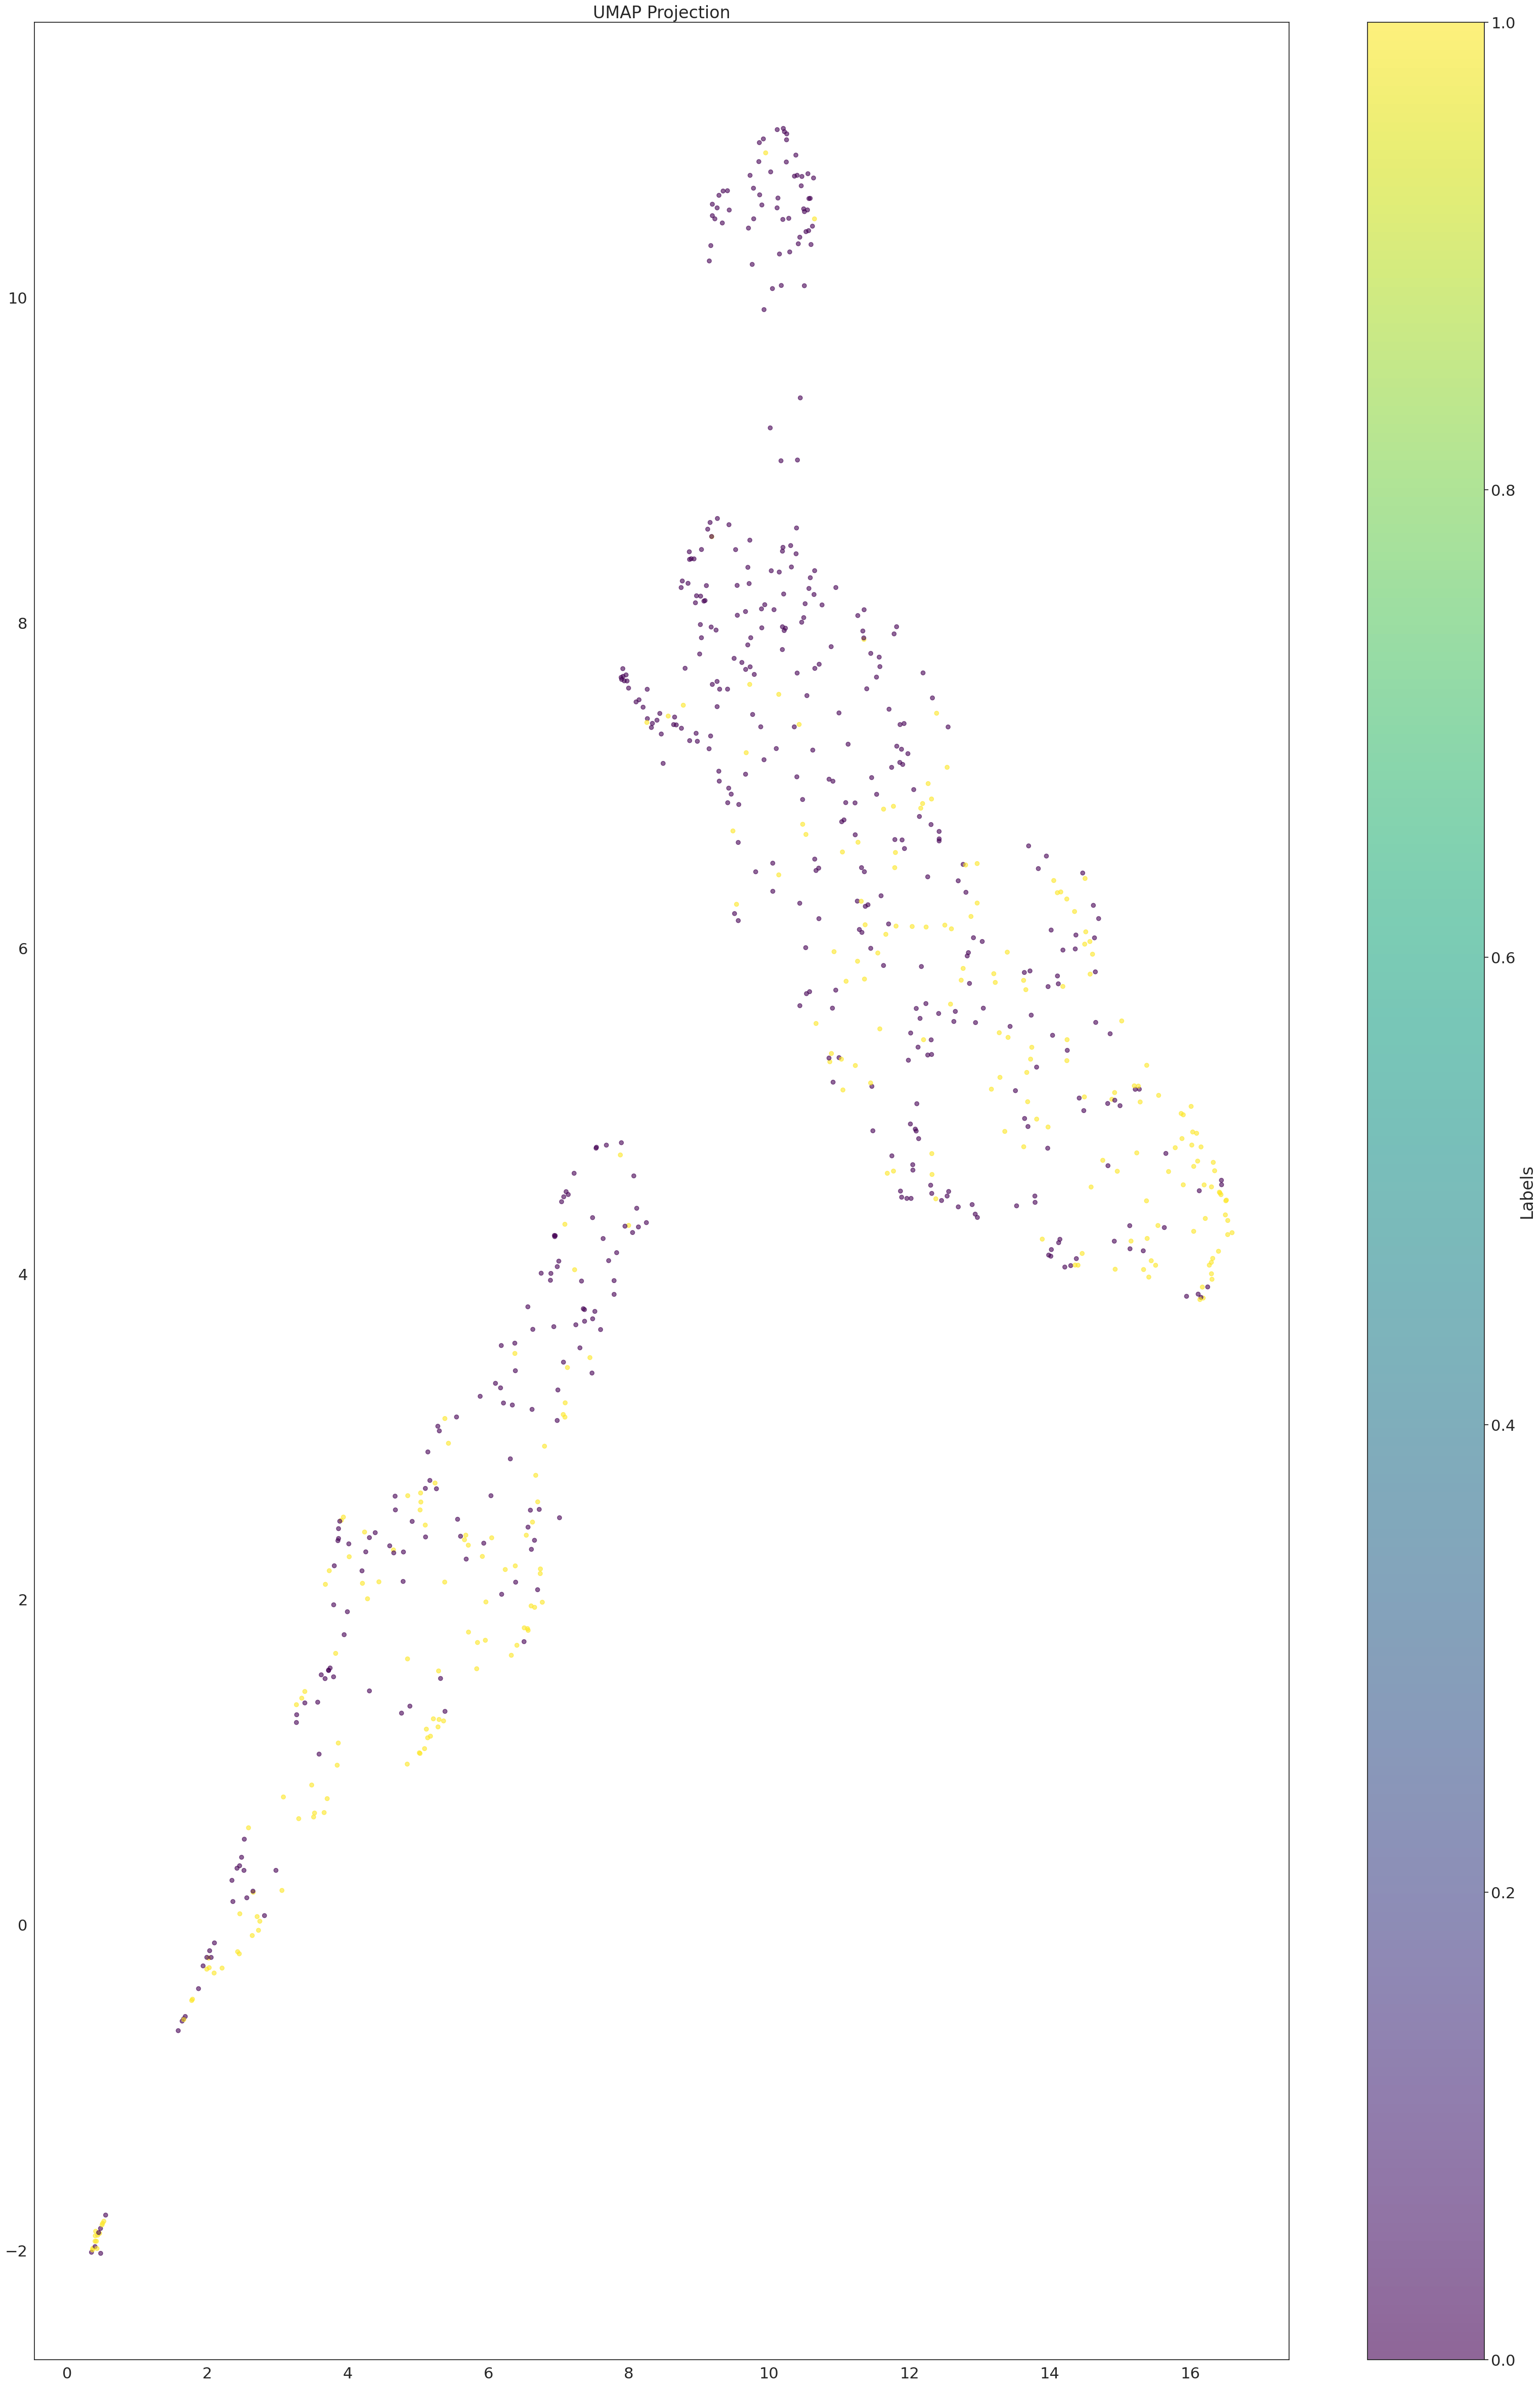

In [ ]:
import umap
import matplotlib.pyplot as plt

# Fit UMAP
mapper = umap.UMAP().fit_transform(X_train)

# Scatter plot
plt.scatter(mapper[:, 0], mapper[:, 1], c=y_train, cmap="viridis", alpha=0.6)
plt.colorbar(label="Labels")
plt.title("UMAP Projection")
plt.show()


In [ ]:
from umap import UMAP

umap_3d = UMAP(n_components=3, init='random', random_state=0)
x_umap = umap_3d.fit_transform(X_train)
umap_df = pd.DataFrame(x_umap)
train_y_sr = pd.Series(y_train,name='label').astype(str)
print(type(x_umap))
new_df = pd.concat([umap_df,train_y_sr],axis=1)
fig = px.scatter_3d(
    new_df, x=0, y=1, z=2,
    color='label', labels={'color': 'number'}
)
fig.update_traces(marker_size=1.5)
fig.show()

<class 'numpy.ndarray'>


In [ ]:
!pip install pycaret

In [ ]:
from pycaret.classification import *

In [ ]:
from pycaret.classification import setup

clf1 = setup(data=diabetes_df,
             target='Outcome',
             preprocess=False,
             verbose=False)


In [ ]:
top5 = compare_models(sort='AUC',
                      n_select = 5,
                      exclude=['lightgbm','xgboost','dummy','svm','ridge','knn','dt','nb','qda']
                     )

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
catboost,CatBoost Classifier,0.7803,0.8462,0.6254,0.7184,0.6642,0.5025,0.5086,3.0520
lr,Logistic Regression,0.7842,0.8406,0.5769,0.7640,0.6514,0.4991,0.5136,2.1300
lda,Linear Discriminant Analysis,0.7768,0.8401,0.5611,0.7557,0.6378,0.4810,0.4966,0.0380
gbc,Gradient Boosting Classifier,0.7747,0.8350,0.6363,0.7057,0.6642,0.4958,0.5013,0.4780
rf,Random Forest Classifier,0.7821,0.8345,0.6196,0.7294,0.6639,0.5048,0.5130,0.4280
et,Extra Trees Classifier,0.7877,0.8308,0.6199,0.7336,0.6701,0.5152,0.5207,0.3100
ada,Ada Boost Classifier,0.7674,0.8124,0.6041,0.7027,0.6441,0.4733,0.4805,0.3820


Processing:   0%|          | 0/37 [00:00<?, ?it/s]

In [ ]:
!pip install catboost

In [ ]:
!pip install pycaret[full]

In [ ]:
from pycaret.classification import create_model

catboost = create_model('catboost')
rf = create_model('rf')
lr = create_model('lr')
lda = create_model('lda')
gbc = create_model('gbc')


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7593,0.8722,0.6316,0.6667,0.6486,0.4658,0.4661
1,0.7963,0.8571,0.5263,0.8333,0.6452,0.5123,0.5389
2,0.8333,0.8752,0.7368,0.7778,0.7568,0.6301,0.6307
3,0.7593,0.8105,0.6316,0.6667,0.6486,0.4658,0.4661
4,0.7037,0.7895,0.5789,0.5789,0.5789,0.3504,0.3504
5,0.7963,0.8481,0.7368,0.7000,0.7179,0.5587,0.5591
6,0.8148,0.8902,0.5789,0.8462,0.6875,0.5624,0.5828
7,0.7925,0.8317,0.6111,0.7333,0.6667,0.5178,0.5223
8,0.7736,0.9016,0.6667,0.6667,0.6667,0.4952,0.4952


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7778,0.8564,0.6316,0.7059,0.6667,0.5008,0.5025
1,0.7963,0.8519,0.5263,0.8333,0.6452,0.5123,0.5389
2,0.8333,0.8752,0.6842,0.8125,0.7429,0.6209,0.6259
3,0.7593,0.7992,0.6316,0.6667,0.6486,0.4658,0.4661
4,0.7222,0.7940,0.6316,0.6000,0.6154,0.3982,0.3985
5,0.7778,0.8023,0.7368,0.6667,0.7000,0.5242,0.5259
6,0.8333,0.8722,0.6316,0.8571,0.7273,0.6112,0.6260
7,0.7547,0.8167,0.5556,0.6667,0.6061,0.4301,0.4339
8,0.7736,0.8802,0.6667,0.6667,0.6667,0.4952,0.4952


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7407,0.8045,0.5263,0.6667,0.5882,0.4028,0.4088
1,0.7963,0.8496,0.6316,0.7500,0.6857,0.5367,0.5410
2,0.7963,0.8586,0.6842,0.7222,0.7027,0.5479,0.5484
3,0.8148,0.8451,0.6842,0.7647,0.7222,0.5840,0.5860
4,0.6667,0.7699,0.4737,0.5294,0.5000,0.2512,0.2520
5,0.7963,0.8692,0.6316,0.7500,0.6857,0.5367,0.5410
6,0.7593,0.8602,0.5263,0.7143,0.6061,0.4384,0.4490
7,0.8302,0.8254,0.5556,0.9091,0.6897,0.5819,0.6154
8,0.8113,0.9111,0.5556,0.8333,0.6667,0.5423,0.5640


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7037,0.8000,0.4737,0.6000,0.5294,0.3175,0.3223
1,0.7778,0.8451,0.5789,0.7333,0.6471,0.4882,0.4954
2,0.7778,0.8602,0.6842,0.6842,0.6842,0.5128,0.5128
3,0.8148,0.8466,0.6842,0.7647,0.7222,0.5840,0.5860
4,0.6667,0.7714,0.4737,0.5294,0.5000,0.2512,0.2520
5,0.7778,0.8767,0.5789,0.7333,0.6471,0.4882,0.4954
6,0.7778,0.8617,0.5263,0.7692,0.6250,0.4749,0.4921
7,0.8302,0.8159,0.5556,0.9091,0.6897,0.5819,0.6154
8,0.8113,0.9127,0.5556,0.8333,0.6667,0.5423,0.5640


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7037,0.8346,0.6842,0.5652,0.6190,0.3802,0.3848
1,0.8333,0.8571,0.5789,0.9167,0.7097,0.6010,0.6322
2,0.8148,0.8722,0.7368,0.7368,0.7368,0.5940,0.5940
3,0.7407,0.8105,0.6316,0.6316,0.6316,0.4316,0.4316
4,0.6667,0.7398,0.4737,0.5294,0.5000,0.2512,0.2520
5,0.7778,0.8496,0.6842,0.6842,0.6842,0.5128,0.5128
6,0.8519,0.8752,0.6842,0.8667,0.7647,0.6588,0.6686
7,0.7925,0.8365,0.6667,0.7059,0.6857,0.5310,0.5315
8,0.7925,0.8651,0.6667,0.7059,0.6857,0.5310,0.5315


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

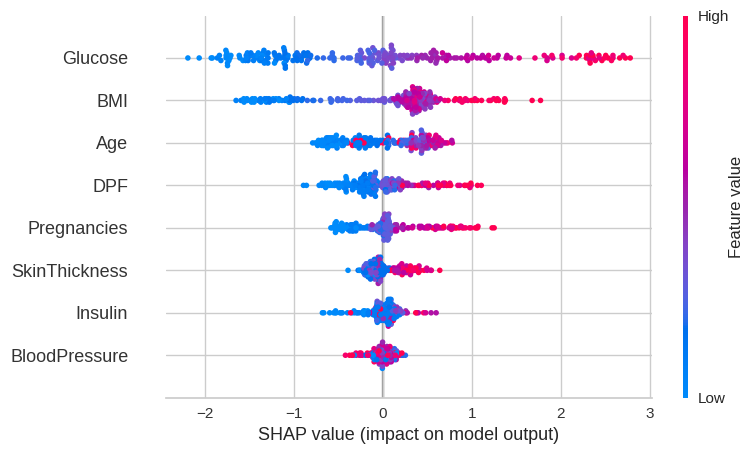

In [ ]:
interpret_model(catboost)

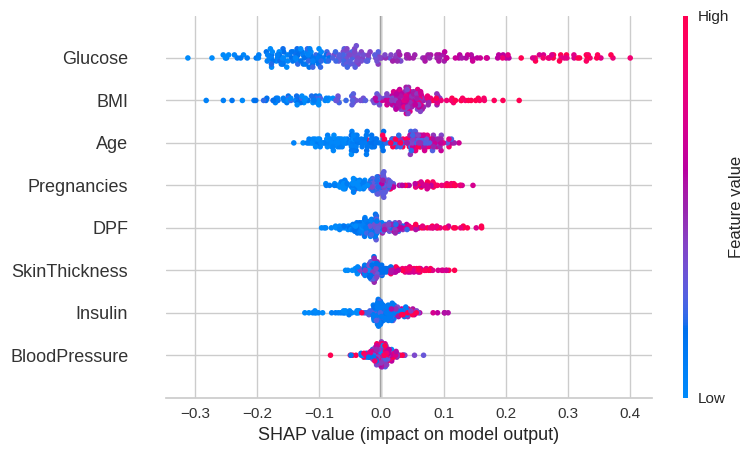

In [ ]:
interpret_model(rf)

In [ ]:
tuned_catboost = tune_model(catboost, optimize = 'AUC')
tuned_rf = tune_model(rf, optimize = 'AUC')
tuned_lr = tune_model(lr, optimize = 'AUC')
tuned_lda = tune_model(lda, optimize = 'AUC')
tuned_gbc = tune_model(gbc, optimize = 'AUC')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7407,0.8301,0.5263,0.6667,0.5882,0.4028,0.4088
1,0.7963,0.8195,0.5263,0.8333,0.6452,0.5123,0.5389
2,0.8148,0.8707,0.6316,0.8000,0.7059,0.5735,0.5820
3,0.7778,0.8331,0.6316,0.7059,0.6667,0.5008,0.5025
4,0.7222,0.8015,0.5263,0.6250,0.5714,0.3682,0.3711
5,0.8148,0.8511,0.6316,0.8000,0.7059,0.5735,0.5820
6,0.7778,0.8887,0.5263,0.7692,0.6250,0.4749,0.4921
7,0.8113,0.8381,0.5556,0.8333,0.6667,0.5423,0.5640
8,0.8113,0.8968,0.6667,0.7500,0.7059,0.5677,0.5698


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7593,0.8812,0.8421,0.6154,0.7111,0.5132,0.5318
1,0.7963,0.8481,0.6316,0.7500,0.6857,0.5367,0.5410
2,0.7963,0.8602,0.7368,0.7000,0.7179,0.5587,0.5591
3,0.6852,0.8226,0.6316,0.5455,0.5854,0.3338,0.3361
4,0.7593,0.7955,0.8421,0.6154,0.7111,0.5132,0.5318
5,0.7778,0.8346,0.7895,0.6522,0.7143,0.5352,0.5417
6,0.8519,0.8857,0.8421,0.7619,0.8000,0.6828,0.6850
7,0.7736,0.8333,0.7778,0.6364,0.7000,0.5211,0.5279
8,0.7736,0.8984,0.8333,0.6250,0.7143,0.5330,0.5482


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6667,0.8150,0.6316,0.5217,0.5714,0.3027,0.3064
1,0.8148,0.8617,0.7895,0.7143,0.7500,0.6035,0.6054
2,0.7593,0.8662,0.7895,0.6250,0.6977,0.5021,0.5116
3,0.8148,0.8421,0.8421,0.6957,0.7619,0.6126,0.6201
4,0.6296,0.7759,0.5263,0.4762,0.5000,0.2070,0.2077
5,0.7963,0.8647,0.8421,0.6667,0.7442,0.5787,0.5896
6,0.7407,0.8602,0.5789,0.6471,0.6111,0.4176,0.4190
7,0.7170,0.8286,0.5556,0.5882,0.5714,0.3604,0.3607
8,0.8113,0.9143,0.8889,0.6667,0.7619,0.6109,0.6282


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7593,0.8150,0.5263,0.7143,0.6061,0.4384,0.4490
1,0.7778,0.8511,0.5789,0.7333,0.6471,0.4882,0.4954
2,0.7963,0.8526,0.7368,0.7000,0.7179,0.5587,0.5591
3,0.8333,0.8466,0.7368,0.7778,0.7568,0.6301,0.6307
4,0.6667,0.7865,0.4737,0.5294,0.5000,0.2512,0.2520
5,0.7963,0.8647,0.6316,0.7500,0.6857,0.5367,0.5410
6,0.7593,0.8632,0.5263,0.7143,0.6061,0.4384,0.4490
7,0.8113,0.8270,0.5556,0.8333,0.6667,0.5423,0.5640
8,0.8113,0.9127,0.6111,0.7857,0.6875,0.5554,0.5644


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7593,0.8481,0.6842,0.6500,0.6667,0.4785,0.4788
1,0.7963,0.8541,0.5263,0.8333,0.6452,0.5123,0.5389
2,0.8148,0.8887,0.7368,0.7368,0.7368,0.5940,0.5940
3,0.6852,0.8271,0.5263,0.5556,0.5405,0.3014,0.3016
4,0.6852,0.7865,0.5789,0.5500,0.5641,0.3180,0.3182
5,0.8148,0.8782,0.6842,0.7647,0.7222,0.5840,0.5860
6,0.7778,0.8977,0.5789,0.7333,0.6471,0.4882,0.4954
7,0.8491,0.8492,0.6111,0.9167,0.7333,0.6339,0.6592
8,0.7736,0.8825,0.6111,0.6875,0.6471,0.4812,0.4830


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [ ]:
stack_model = stack_models(estimator_list = top5, meta_model = top5[0],optimize = 'AUC')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7037,0.7970,0.4737,0.6000,0.5294,0.3175,0.3223
1,0.7593,0.8000,0.4737,0.7500,0.5806,0.4236,0.4456
2,0.8148,0.8632,0.7368,0.7368,0.7368,0.5940,0.5940
3,0.7778,0.8496,0.5789,0.7333,0.6471,0.4882,0.4954
4,0.6667,0.7519,0.4737,0.5294,0.5000,0.2512,0.2520
5,0.7778,0.8165,0.5263,0.7692,0.6250,0.4749,0.4921
6,0.7778,0.8511,0.6316,0.7059,0.6667,0.5008,0.5025
7,0.7925,0.8508,0.5000,0.8182,0.6207,0.4890,0.5171
8,0.8113,0.8984,0.6111,0.7857,0.6875,0.5554,0.5644


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

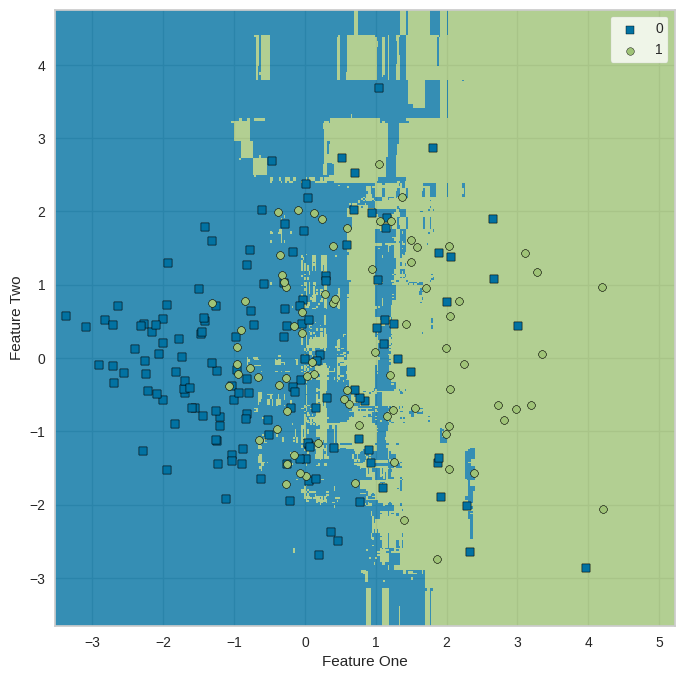

In [ ]:
plt.figure(figsize=(8, 8))
plot_model(stack_model, plot='boundary')

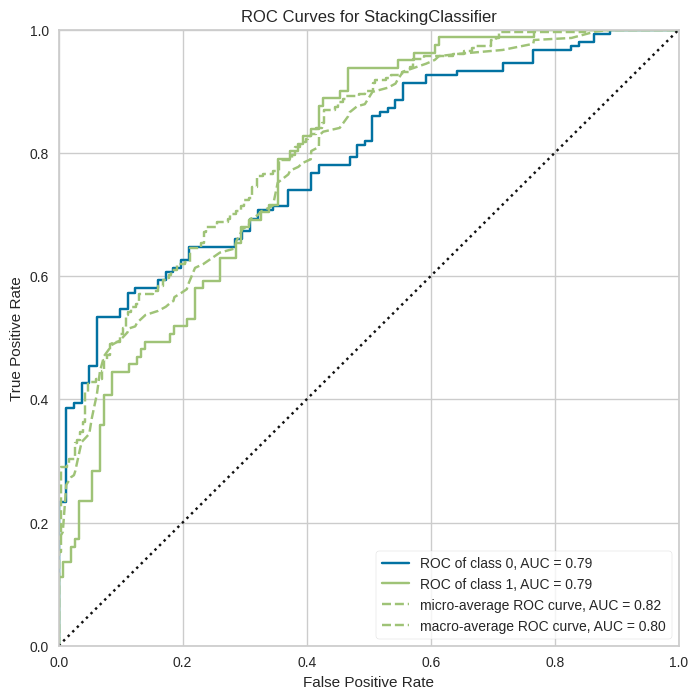

In [ ]:
plt.figure(figsize=(8, 8))
plot_model(stack_model, plot = 'auc')

In [ ]:
#prediction
pred = stack_model.predict(X_test)
pred_proba = stack_model.predict_proba(X_test)[:,1]
#Accuracy
confusion_stack = get_clf_eval(y_test,pred,pred_proba)

accuracy: 0.8177, precision: 0.7742, recall: 0.6957,    F1: 0.7328, AUC:0.8929


Text(0.5, 1.0, 'Confusion Matrix (Stacking)')

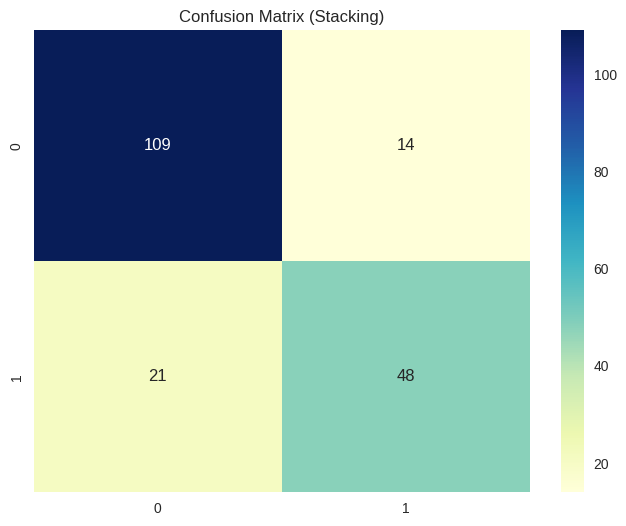

In [ ]:
plt.figure(figsize=(8, 6))
ax = sns.heatmap(confusion_stack, cmap = 'YlGnBu',annot = True, fmt='d')
ax.set_title('Confusion Matrix (Stacking)')

In [ ]:
blend_soft = blend_models(estimator_list = top5, optimize = 'AUC',method = 'soft')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7407,0.8496,0.6316,0.6316,0.6316,0.4316,0.4316
1,0.7778,0.8586,0.4737,0.8182,0.6000,0.4609,0.4939
2,0.8333,0.8707,0.7368,0.7778,0.7568,0.6301,0.6307
3,0.7593,0.8271,0.6316,0.6667,0.6486,0.4658,0.4661
4,0.7037,0.7624,0.5263,0.5882,0.5556,0.3344,0.3355
5,0.8148,0.8662,0.6842,0.7647,0.7222,0.5840,0.5860
6,0.7963,0.8827,0.5789,0.7857,0.6667,0.5248,0.5375
7,0.7925,0.8349,0.5556,0.7692,0.6452,0.5038,0.5172
8,0.7925,0.9063,0.7222,0.6842,0.7027,0.5435,0.5439


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

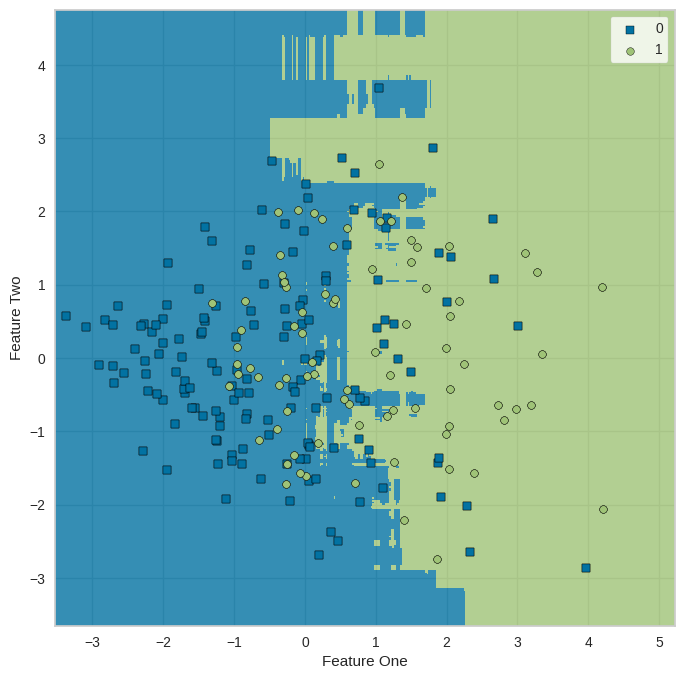

In [ ]:
plt.figure(figsize=(8, 8))
plot_model(blend_soft, plot='boundary')

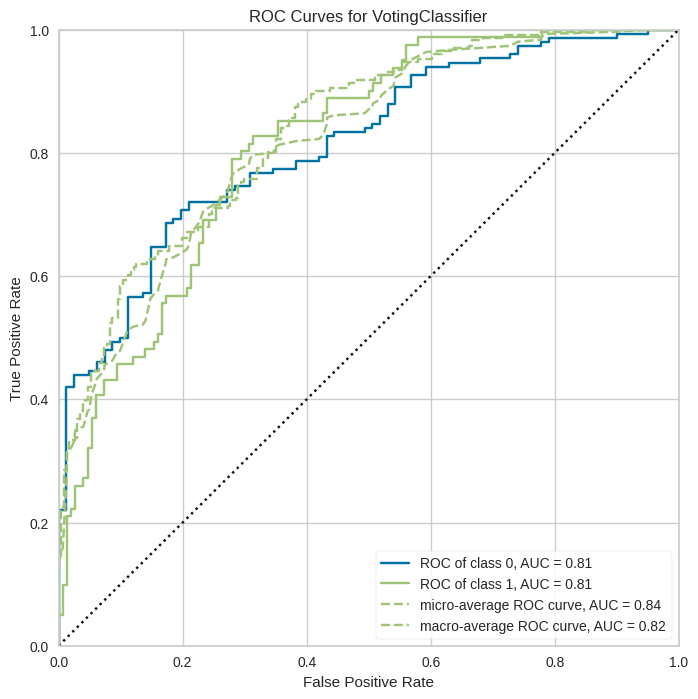

In [ ]:
plt.figure(figsize=(8, 8))
plot_model(blend_soft, plot = 'auc')

In [ ]:
#prediction
pred = blend_soft.predict(X_test)
pred_proba = blend_soft.predict_proba(X_test)[:,1]
#Accuracy
confusion_soft = get_clf_eval(y_test,pred,pred_proba)

accuracy: 0.8385, precision: 0.7794, recall: 0.7681,    F1: 0.7737, AUC:0.9209


Text(0.5, 1.0, 'Confusion Matrix (Soft Blending)')

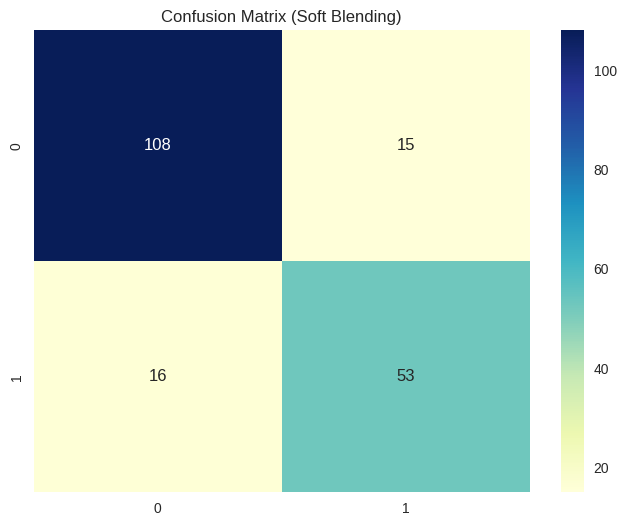

In [ ]:
plt.figure(figsize=(8, 6))
ax = sns.heatmap(confusion_soft, cmap = 'YlGnBu',annot = True, fmt='d')
ax.set_title('Confusion Matrix (Soft Blending)')

In [ ]:
blend_hard = blend_models(estimator_list = top5, optimize = 'AUC',method = 'hard')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7593,0.0000,0.6316,0.6667,0.6486,0.4658,0.4661
1,0.8148,0.0000,0.5789,0.8462,0.6875,0.5624,0.5828
2,0.8333,0.0000,0.7368,0.7778,0.7568,0.6301,0.6307
3,0.7593,0.0000,0.6316,0.6667,0.6486,0.4658,0.4661
4,0.7037,0.0000,0.5263,0.5882,0.5556,0.3344,0.3355
5,0.8148,0.0000,0.7368,0.7368,0.7368,0.5940,0.5940
6,0.8148,0.0000,0.5789,0.8462,0.6875,0.5624,0.5828
7,0.7925,0.0000,0.6111,0.7333,0.6667,0.5178,0.5223
8,0.7736,0.0000,0.6111,0.6875,0.6471,0.4812,0.4830


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

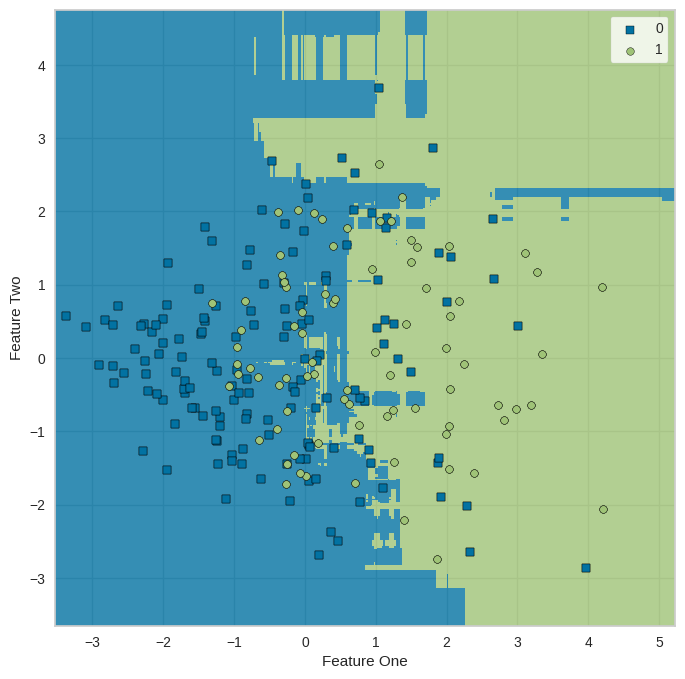

In [ ]:
plt.figure(figsize=(8, 8))
plot_model(blend_hard, plot='boundary')

In [ ]:
#prediction
pred = blend_hard.predict(X_test)
#Accuracy
confusion_hard = confusion_matrix( y_test, pred)
accuracy = accuracy_score(y_test , pred)
precision = precision_score(y_test , pred)
recall = recall_score(y_test , pred)
f1 = f1_score(y_test,pred)
print('accuracy: {0:.4f}, precision: {1:.4f}, recall: {2:.4f},\
F1: {3:.4f}'.format(accuracy, precision, recall, f1))

accuracy: 0.8594, precision: 0.8000, recall: 0.8116,F1: 0.8058


Text(0.5, 1.0, 'Confusion Matrix (Hard Blending)')

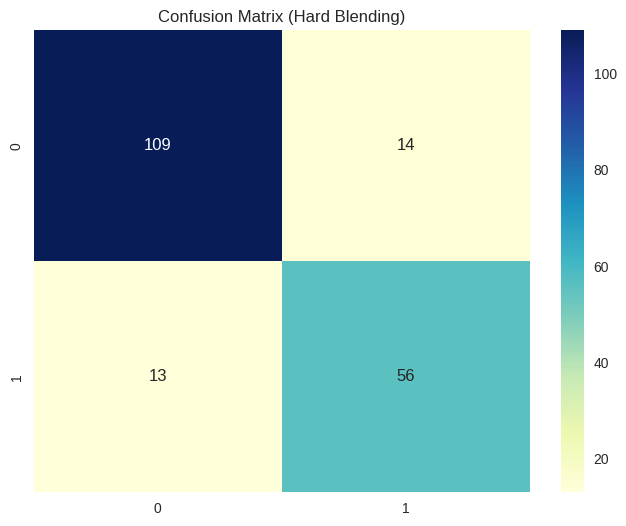

In [ ]:
plt.figure(figsize=(8, 6))
ax = sns.heatmap(confusion_hard, cmap = 'YlGnBu',annot = True, fmt='d')
ax.set_title('Confusion Matrix (Hard Blending)')

In [ ]:
cali_model = calibrate_model(blend_soft)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7593,0.8451,0.6316,0.6667,0.6486,0.4658,0.4661
1,0.7963,0.8632,0.5263,0.8333,0.6452,0.5123,0.5389
2,0.8148,0.8692,0.7368,0.7368,0.7368,0.5940,0.5940
3,0.7593,0.8271,0.6316,0.6667,0.6486,0.4658,0.4661
4,0.7037,0.7789,0.5263,0.5882,0.5556,0.3344,0.3355
5,0.8333,0.8647,0.6842,0.8125,0.7429,0.6209,0.6259
6,0.7778,0.8812,0.5263,0.7692,0.6250,0.4749,0.4921
7,0.8113,0.8317,0.5556,0.8333,0.6667,0.5423,0.5640
8,0.7925,0.8984,0.7222,0.6842,0.7027,0.5435,0.5439


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

In [ ]:
final_model = finalize_model(cali_model)

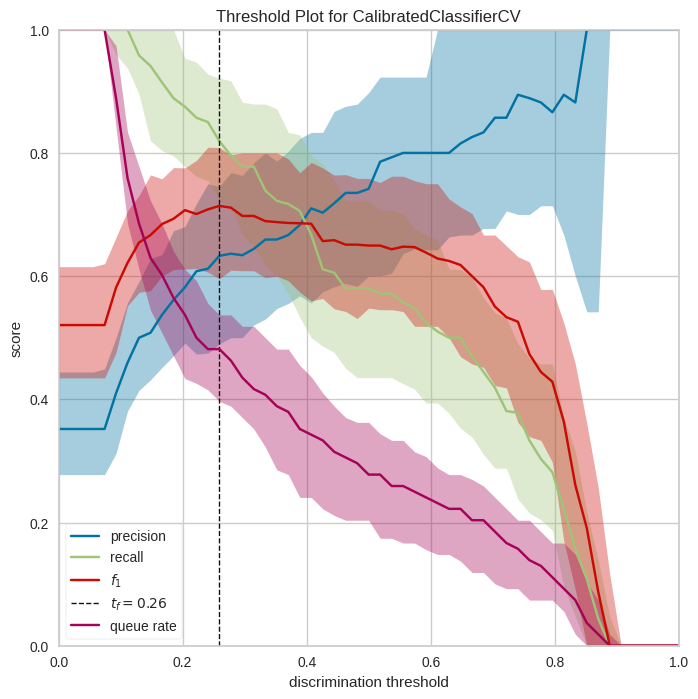

In [ ]:
plt.figure(figsize=(8, 8))
plot_model(final_model, plot='threshold')

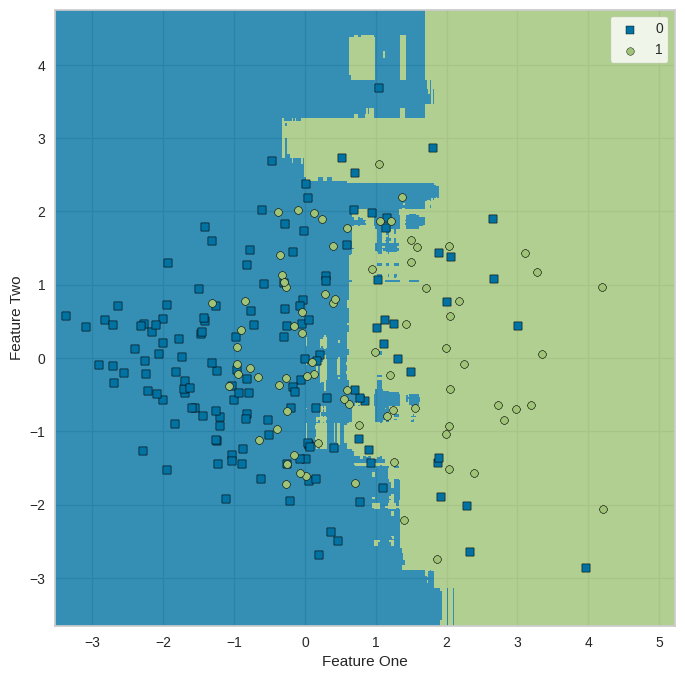

In [ ]:
plt.figure(figsize=(8, 8))
plot_model(final_model, plot='boundary')

In [ ]:
#prediction
pred = final_model.predict(X_test)
#Accuracy
final_model = confusion_matrix( y_test, pred)
accuracy = accuracy_score(y_test , pred)
precision = precision_score(y_test , pred)
recall = recall_score(y_test , pred)
f1 = f1_score(y_test,pred)
print('accuracy: {0:.4f}, precision: {1:.4f}, recall: {2:.4f},\
F1: {3:.4f}'.format(accuracy, precision, recall, f1))

accuracy: 0.8698, precision: 0.8793, recall: 0.7391,F1: 0.8031


Text(0.5, 1.0, 'Confusion Matrix (final_model)')

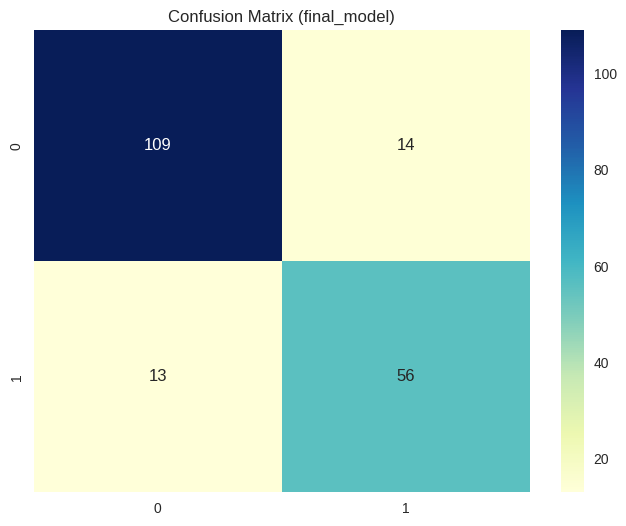

In [ ]:
plt.figure(figsize=(8, 6))
ax = sns.heatmap(confusion_hard, cmap = 'YlGnBu',annot = True, fmt='d')
ax.set_title('Confusion Matrix (final_model)')